## SMS/Email Classifier using machine learning

In [ ]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Improvement

 ### 1. Data Cleaning

In [3]:
# importig the required libraries to preform data cleaning and EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from wordcloud import WordCloud
from collections import Counter


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pawar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# folowing code loads the data set . sometimes the data sets throws an error while loading 
# due to encoding problems so we need write the following code to encode the dataset and load it
import pandas as pd 

# these are the encoders which we required
encodings = ['utf-8','latin1','ISO-8859-1','cp1252']

# giving the file path
file_path = "D:\spam.csv"

for encoding in encodings:
    try:
        df = pd.read_csv(file_path , encoding=encoding)
        print(f'file successfully read with encofing : {encoding}')
        break
    except UnicodeDecodeError :
        print(f'failed to read with encoding : {encoding}')
        continue
    
if 'df' in locals():
    print('csv file has been successfully loaded.')
else:
    print(f'all encoding attempts failed . unable to read the csv file.')

failed to read with encoding : utf-8
file successfully read with encofing : latin1
csv file has been successfully loaded.


In [6]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [7]:
# taking basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# deleting unnecessary columns
del df['Unnamed: 4']
del df['Unnamed: 3']
del df['Unnamed: 2']

In [9]:
# renaming the cloumns
df.rename(columns={'v1': 'type','v2': 'text'}, inplace=True)
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# fiting the encoder to get 0 and 1 in place of ham and spam
df['type'] = encoder.fit_transform(df['type'])

In [11]:
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# checking if there are any null value
df.isna().sum()

type    0
text    0
dtype: int64

In [13]:
# checking if there are any null values
print('Dublicate values :', df.duplicated().sum())

Dublicate values : 403


In [14]:
# removing the dublicated values and keeping first

df['text'] : df.drop_duplicates(keep='first', inplace=True)
print("Dublicate values :" , df.duplicated().sum())

Dublicate values : 0


### 2. EDA

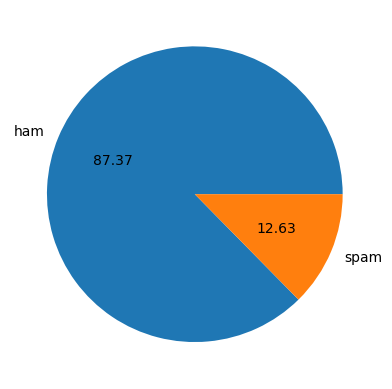

In [15]:
# printing a pie chart to confirm whether data balanced ar imbalanced
df['type'].value_counts()
plt.pie(df['type'].value_counts() , labels=['ham','spam'] , autopct='%0.2f')
plt.show()
# data is imbalances

In [16]:
# impoting a library
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pawar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# preparing a function to count number of word , sentances , length
word_num = []

for i in df['text'].apply(lambda x : nltk.word_tokenize(x)):
    word_num.append(len(i))
    


sent_num = []

for i in df['text'].apply(lambda x : nltk.sent_tokenize(x)):
    sent_num.append(len(i))
    
    
character_num = []

for i in df['text']:
    character_num.append(len(i))
    
    
# creating a columns and adding it to the dataset
df['word count']= word_num
df['character num'] = character_num
df['sentance num'] = sent_num

In [18]:
df.head()

,type,text,word count,character num,sentance num
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,0,Ok lar... Joking wif u oni...,8,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1


In [19]:
# basic information about spam massages

df[df['type'] == 1 ] [['word count','character num','sentance num']].describe()

,word count,character num,sentance num
count,653.000000,653.000000,653.000000
mean,27.667688,137.891271,2.970904
std,7.008418,30.137753,1.488425
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,224.000000,9.000000


In [20]:
# basic information about ham massages

df[df['type'] == 0 ] [['word count','character num','sentance num']].describe()

,word count,character num,sentance num
count,4516.000000,4516.000000,4516.000000
mean,17.123782,70.459256,1.820195
std,13.493970,56.358207,1.383657
min,1.000000,2.000000,1.000000
25%,8.000000,34.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,22.000000,90.000000,2.000000
max,220.000000,910.000000,38.000000


<Axes: xlabel='character num', ylabel='Count'>

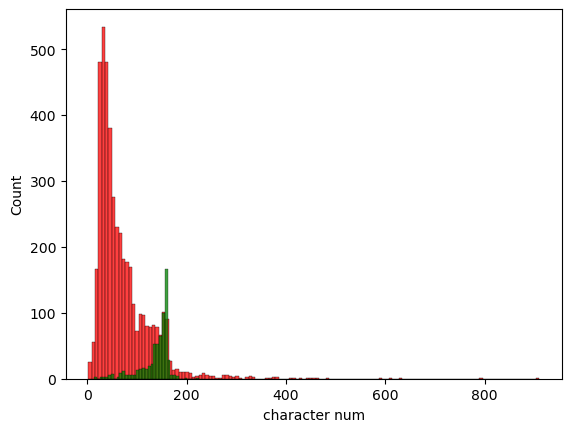

In [21]:
# ploting relation between spam and ham character number 
sns.histplot(df[df['type'] == 0] ['character num'] , color='red')
sns.histplot(df[df['type'] == 1] ['character num'] , color= 'green')

<Axes: xlabel='word count', ylabel='Count'>

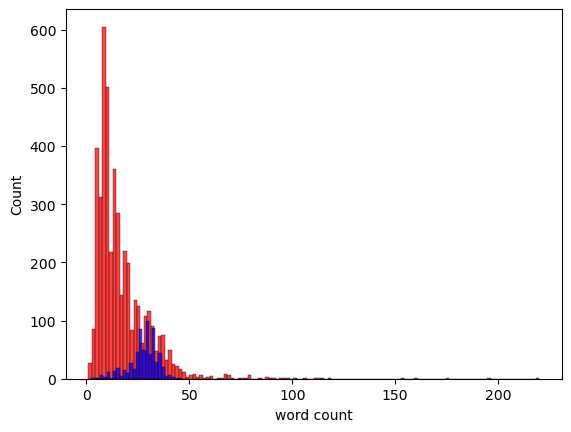

In [22]:
# ploting relation between spam and word count
sns.histplot(df[df['type'] == 0] ['word count'] , color='red')
sns.histplot(df[df['type'] == 1] ['word count'] , color= 'blue')

<Axes: xlabel='sentance num', ylabel='Count'>

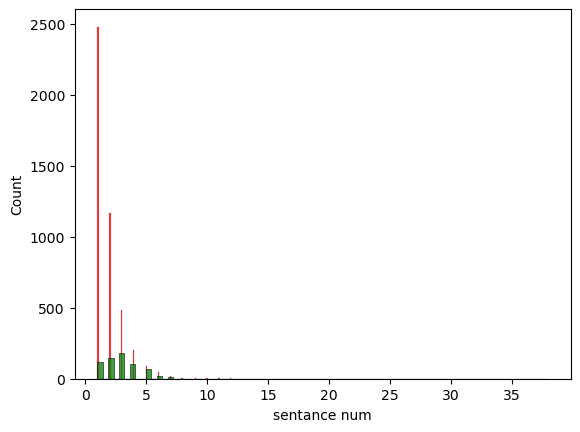

In [23]:
# ploting relation between spam and ham sentance number 
sns.histplot(df[df['type'] == 0] ['sentance num'] , color='red')
sns.histplot(df[df['type'] == 1] ['sentance num'] , color= 'green')

c:\Users\pawar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


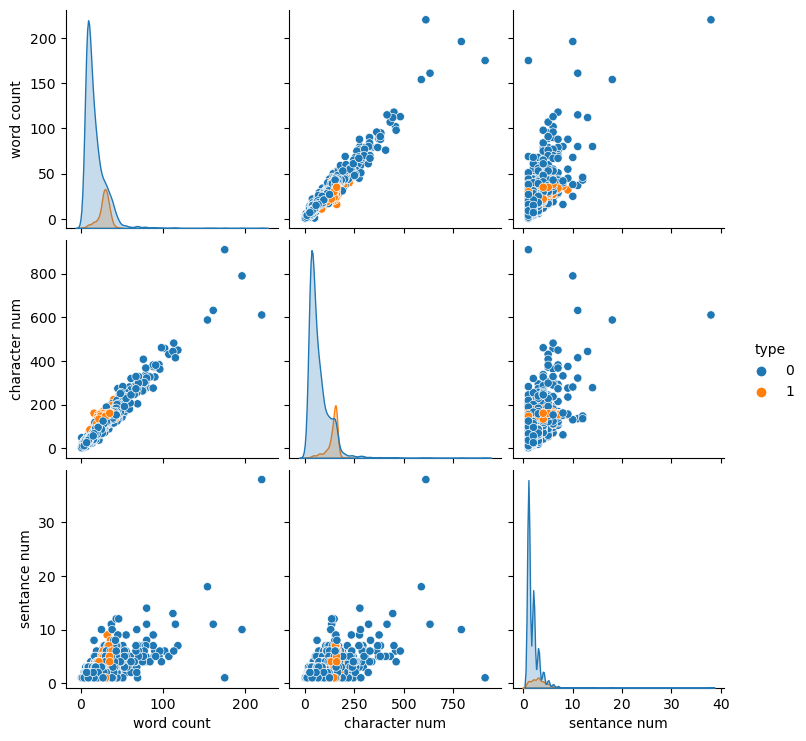

In [24]:
# ploting pair plot
sns.pairplot(df , hue='type')

### 3. Text Preprocessing

In [25]:
# 1 text lowering
# 2 word tokenize
# 3 isalnum
# 4 stopwords and punctuations
# 5 steaming

def preprocessing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    #return text

    text_1 = []
    for i in text:
        if i.isalnum():
            text_1.append(i)
    #return text_1
    text = text_1[:]
    text_1.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            text_1.append(i)
    #return text_1
    text =text_1[:]
    text_1.clear()
    
    for i in text:
        if (ps.stem(i)):
            text_1.append(i)
    return " ".join(text_1)

In [26]:
#applying fuction which we have created earlier
df['text'].apply(preprocessing)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u pound prize 2 claim...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [27]:
#applying fuction which we have created earlier and creating column
df['transformed_text'] = df['text'].apply(preprocessing)

In [28]:
df.head()

,type,text,word count,character num,sentance num,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goes usf lives around though


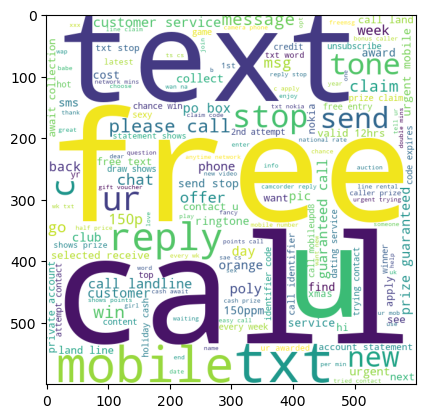

In [29]:
# creating a wordcloud object so we can have mostly appear words in a spam massages in a picture format 
wc = WordCloud(width= 600 ,height=  600 ,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['type'] == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

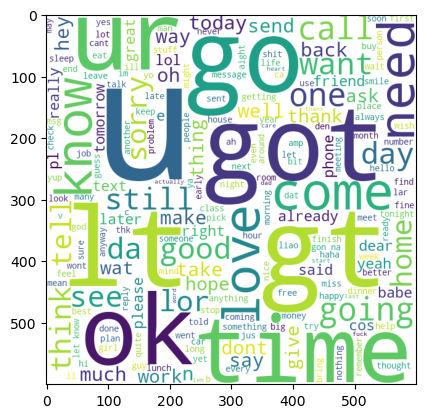

In [30]:
# creating a wordcloud object so we can have mostly appear words in a ham massages in a picture format 
ham_wc = wc.generate(df[df['type'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

In [31]:
# spliting word and adding it to empty list
spam = []    # empty list
ham  = []    # empty list

# appending tha words which has been used in spam massages
for i in df[df['type'] == 1 ]['transformed_text'].tolist():
    for word in i.split():
        spam.append(word)

# appending tha words which has been used in ham massages
for i in df[df['type'] == 0 ]['transformed_text'].tolist():
    for word in i.split():
        ham.append(word)

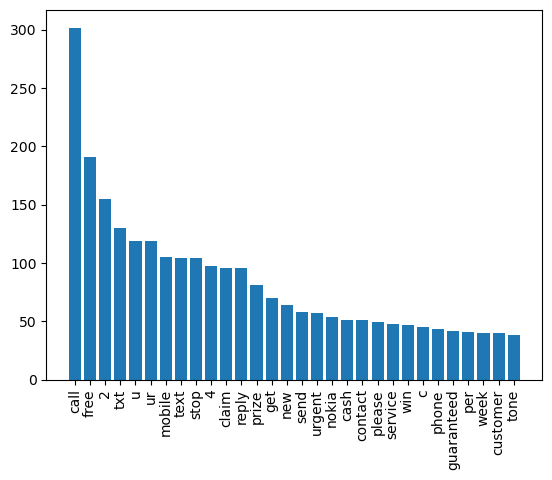

In [32]:
# data visulization of spam massages 
# Mostly appeard words in spam massages
df_1 = pd.DataFrame(Counter(spam).most_common(30),columns=['word','count'])
x = df_1['word']
y = df_1['count']
plt.bar(x,y)
plt.xticks(rotation = 'vertical')
plt.show()

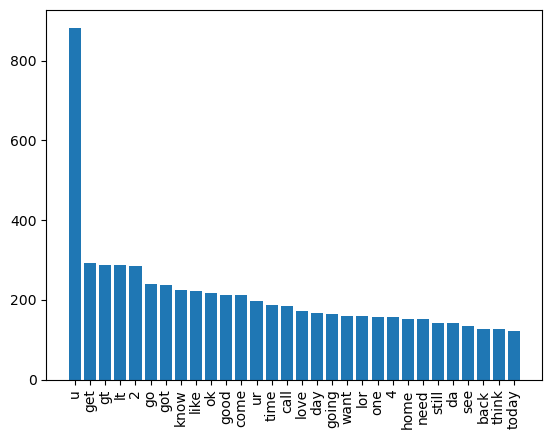

In [33]:
# data visulization of ham massages 
# Mostly appeard words in ham massages
df_2= pd.DataFrame(Counter(ham).most_common(30),columns=['word','count'])
x = df_2['word']
y = df_2['count']
plt.bar(x,y)
plt.xticks(rotation = 'vertical')
plt.show()

### 4. Model traning

In [34]:
# imporing required algorithems
# and calling them

from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix

In [35]:
# using CountVectorizer
X = cv.fit_transform(df['transformed_text']).toarray()
y = df['type'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# MultinomialNB
print('-'*50)
print('using MultinomialNB ')
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print("accuracy_score   : ",accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("precision_score  : ",precision_score(y_test,y_pred1))


# BernoulliNB
print('-'*50)
print('-'*50)
print('using BernoulliNB ')
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print("accuracy_score   : ",accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("precision_score  : ",precision_score(y_test,y_pred1))

# GaussianNB
print('-'*50)
print('-'*50)
print('using GaussianNB ')
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy_score   : ",accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("precision_score  : ",precision_score(y_test,y_pred1))

--------------------------------------------------
using MultinomialNB 
accuracy_score   :  0.9671179883945842
[[872  24]
 [ 10 128]]
precision_score  :  0.8421052631578947
--------------------------------------------------
--------------------------------------------------
using BernoulliNB 
accuracy_score   :  0.9680851063829787
[[892   4]
 [ 29 109]]
precision_score  :  0.9646017699115044
--------------------------------------------------
--------------------------------------------------
using GaussianNB 
accuracy_score   :  0.9013539651837524
[[811  85]
 [ 17 121]]
precision_score  :  0.587378640776699


In [36]:
# using TfidfVectorizer
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['type'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# MultinomialNB
print('-'*50)
print('using MultinomialNB ')
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print("accuracy_score   : ",accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("precision_score  : ",precision_score(y_test,y_pred1))


# BernoulliNB
print('-'*50)
print('-'*50)
print('using BernoulliNB ')
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print("accuracy_score   : ",accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("precision_score  : ",precision_score(y_test,y_pred1))

# GaussianNB
print('-'*50)
print('-'*50)
print('using GaussianNB ')
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy_score   : ",accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("precision_score  : ",precision_score(y_test,y_pred1))

--------------------------------------------------
using MultinomialNB 
accuracy_score   :  0.9535783365570599
[[896   0]
 [ 48  90]]
precision_score  :  1.0
--------------------------------------------------
--------------------------------------------------
using BernoulliNB 
accuracy_score   :  0.9680851063829787
[[892   4]
 [ 29 109]]
precision_score  :  0.9646017699115044
--------------------------------------------------
--------------------------------------------------
using GaussianNB 
accuracy_score   :  0.8936170212765957
[[811  85]
 [ 25 113]]
precision_score  :  0.5707070707070707


### 5. Model Improvement

In [37]:
# model optimization 
# using TfidfVectorizer with max feature

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['type'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# BernoulliNB
print('_'*50)
print('using MultinomialNB ')
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print("accuracy_score   : ",accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("precision_score  : ",precision_score(y_test,y_pred1))

# BernoulliNB
print('_'*50)
print('_'*50)
print('using BernoulliNB ')
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print("accuracy_score   : ",accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("precision_score  : ",precision_score(y_test,y_pred1))

# GaussianNB
print('_'*50)
print('_'*50)
print('using GaussianNB ')
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy_score   : ",accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("precision_score  : ",precision_score(y_test,y_pred1))

__________________________________________________
using MultinomialNB 
accuracy_score   :  0.9738878143133463
[[896   0]
 [ 27 111]]
precision_score  :  1.0
__________________________________________________
__________________________________________________
using BernoulliNB 
accuracy_score   :  0.9816247582205029
[[895   1]
 [ 18 120]]
precision_score  :  0.9917355371900827
__________________________________________________
__________________________________________________
using GaussianNB 
accuracy_score   :  0.8829787234042553
[[800  96]
 [ 25 113]]
precision_score  :  0.5406698564593302


##### After the optimization of model by TfidfVectorizer with max feature the precision score increases of madel and aslo the model is not making any mistake and also BernoulliNB with TfidfVectorizer with max feature is also performing well but the precision score is is quite low tha MultinomialNB  hence its good for further process

##### With the help of above results with optimization, we can conclude that MultinomialNB with TfidfVectorizer and max feature 3000 have that high precision score which we want 
##### because it's a high precision model it should predict any ham massage that it is spam hence here we can use MultinomialNB with TfidfVectorizer and max feature 3000 for modeling


In [38]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))